In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import convolve2d

# specify the way plots behave in jupyter notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 8.0) # set default size of plots
plt.rcParams['image.cmap'] = 'gray'


In [2]:
import platform
print("Python version: ", platform.python_version())
print("Numpy version: ", np.__version__)

Python version:  3.11.5
Numpy version:  1.24.2


**Harris Corner Detector**

In [3]:
def H_corner(img, sigma_smooth, sigma_neighb, th, density_size, display=False, k=0.04):
    # Compute Derivative of Gaussian Kernels
    kernel_size = int(6 * sigma_smooth + 1)
    if kernel_size % 2 == 0:
        kernel_size += 1  # Ensure kernel size is odd

    ax = np.linspace(-(kernel_size - 1) / 2, (kernel_size - 1) / 2, kernel_size)
    x, y = np.meshgrid(ax,ax)

    #Calculat the gausian derivation
    Gauss = (1/(2*np.pi*sigma_smooth**2))*np.exp(-(np.square(x) + np.square(y))/(2*sigma_smooth**2))
    G_dx = Gauss * ((-x) / sigma_smooth**2)
    G_dy = Gauss * ((-y) / sigma_smooth**2)

    # Compute two matrixes, I_x and I_y - Image Derivatives
    I_x = convolve2d(img, G_dx, mode='same')
    I_y = convolve2d(img, G_dy, mode='same')

    #Compute matrices: C11, C12, C22,  each corresponds to a different entry of the matrix for C
    #convolving the matrices computed in Grad_xy with a Gaussian defined by $\sigma_{neighb}$
    GaussianKernel = cv2.getGaussianKernel(kernel_size, sigma_neighb, cv2.CV_64F)
    GaussianKernel = GaussianKernel.dot(GaussianKernel.T)  # Create a 2D Gaussian kernel
    C11 = convolve2d(I_x ** 2, GaussianKernel, mode='same')
    C12 = convolve2d(I_x * I_y, GaussianKernel, mode='same')
    C22 = convolve2d(I_y ** 2, GaussianKernel, mode='same')

    #Compute $d(q)= det(C)-k\cdot Trace(C)^2$.
    det_C = C11 * C22 - C12 ** 2
    trace_C = C11 + C22
    d_q = det_C - k * (trace_C ** 2)

    #Apply Threshold
    d_q_pre_threshold = d_q.copy()
    d_q[d_q < th] = 0

    # Perform non-maximum suppression
    corners = []
    for i in range(density_size, d_q.shape[0] - density_size):
        for j in range(density_size, d_q.shape[1] - density_size):
            region = d_q[i-density_size:i+density_size+1, j-density_size:j+density_size+1]
            if d_q[i, j] == np.max(region) and d_q[i, j] > 0:
                corners.append(((j, i), d_q[i, j]))  # (coordinates, strength)
    # We couldn't find a more efficient way to compute it vectorized without using loops

    # Return and Display Results
    if display:
        plt.figure(figsize=(15, 10))
        plt.subplot(231), plt.imshow(img, cmap='gray'), plt.title('Original Image')
        plt.subplot(232), plt.imshow(I_x, cmap='gray'), plt.title('Ix')
        plt.subplot(233), plt.imshow(I_y, cmap='gray'), plt.title('Iy')
        plt.subplot(234), plt.imshow(d_q_pre_threshold, cmap='gray'), plt.title('Corner Strength (Before Threshold)')
        plt.subplot(235), plt.imshow(d_q, cmap='gray'), plt.title('Corner Strength (After Threshold)')
        plt.subplot(236), plt.imshow(img, cmap='gray'), plt.title('Detected Corners')
        if corners:
            corners_arr = np.array([coord for coord, _ in corners])
            plt.scatter(corners_arr[:, 0], corners_arr[:, 1], s=5, c='r', marker='o')
        plt.show()


    return corners


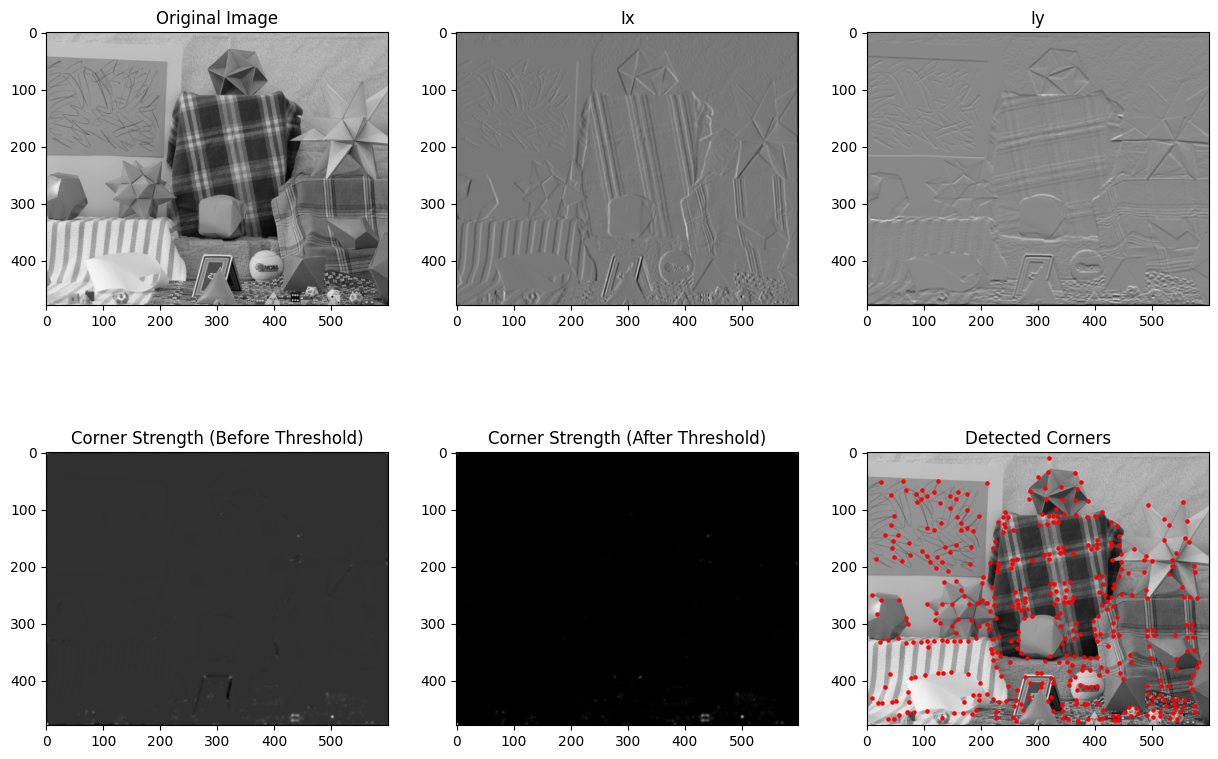

[((319, 9), 133.11010982136924), ((318, 34), 1583.949365028029), ((365, 35), 1585.026664246601), ((301, 43), 149.5624937784641), ((63, 49), 152.95585514236654), ((124, 50), 926.949390951695), ((25, 51), 842.1707989381625), ((376, 51), 70.27011338804084), ((211, 53), 786.5138055873176), ((340, 60), 94.90953417097734), ((313, 62), 773.2587344774878), ((369, 64), 6898.003391159669), ((69, 65), 264.7818107033013), ((96, 66), 384.8736092363291), ((286, 68), 4815.697877088101), ((160, 69), 320.3807318858548), ((117, 70), 202.9438690056299), ((86, 72), 835.6493662721657), ((175, 72), 130.20152471554454), ((43, 75), 126.72579730823557), ((105, 76), 185.9563909204593), ((146, 77), 118.50320811357335), ((95, 81), 744.1742844259948), ((156, 81), 88.26003605504282), ((285, 81), 76.08577569710837), ((315, 82), 15226.391608685568), ((342, 82), 243.2814319717392), ((365, 84), 746.4010691007734), ((387, 85), 15724.162771594187), ((88, 86), 677.7531581200175), ((554, 87), 465.99560412868993), ((128, 89

In [4]:
# Example usage
# Load an image in grayscale
image = cv2.imread('images/view0.tif', cv2.IMREAD_GRAYSCALE)

corners = H_corner(image, sigma_smooth=1, sigma_neighb=2, th=70, density_size=5, display=True)
print(corners)

**Part 1 - Script for Testing**

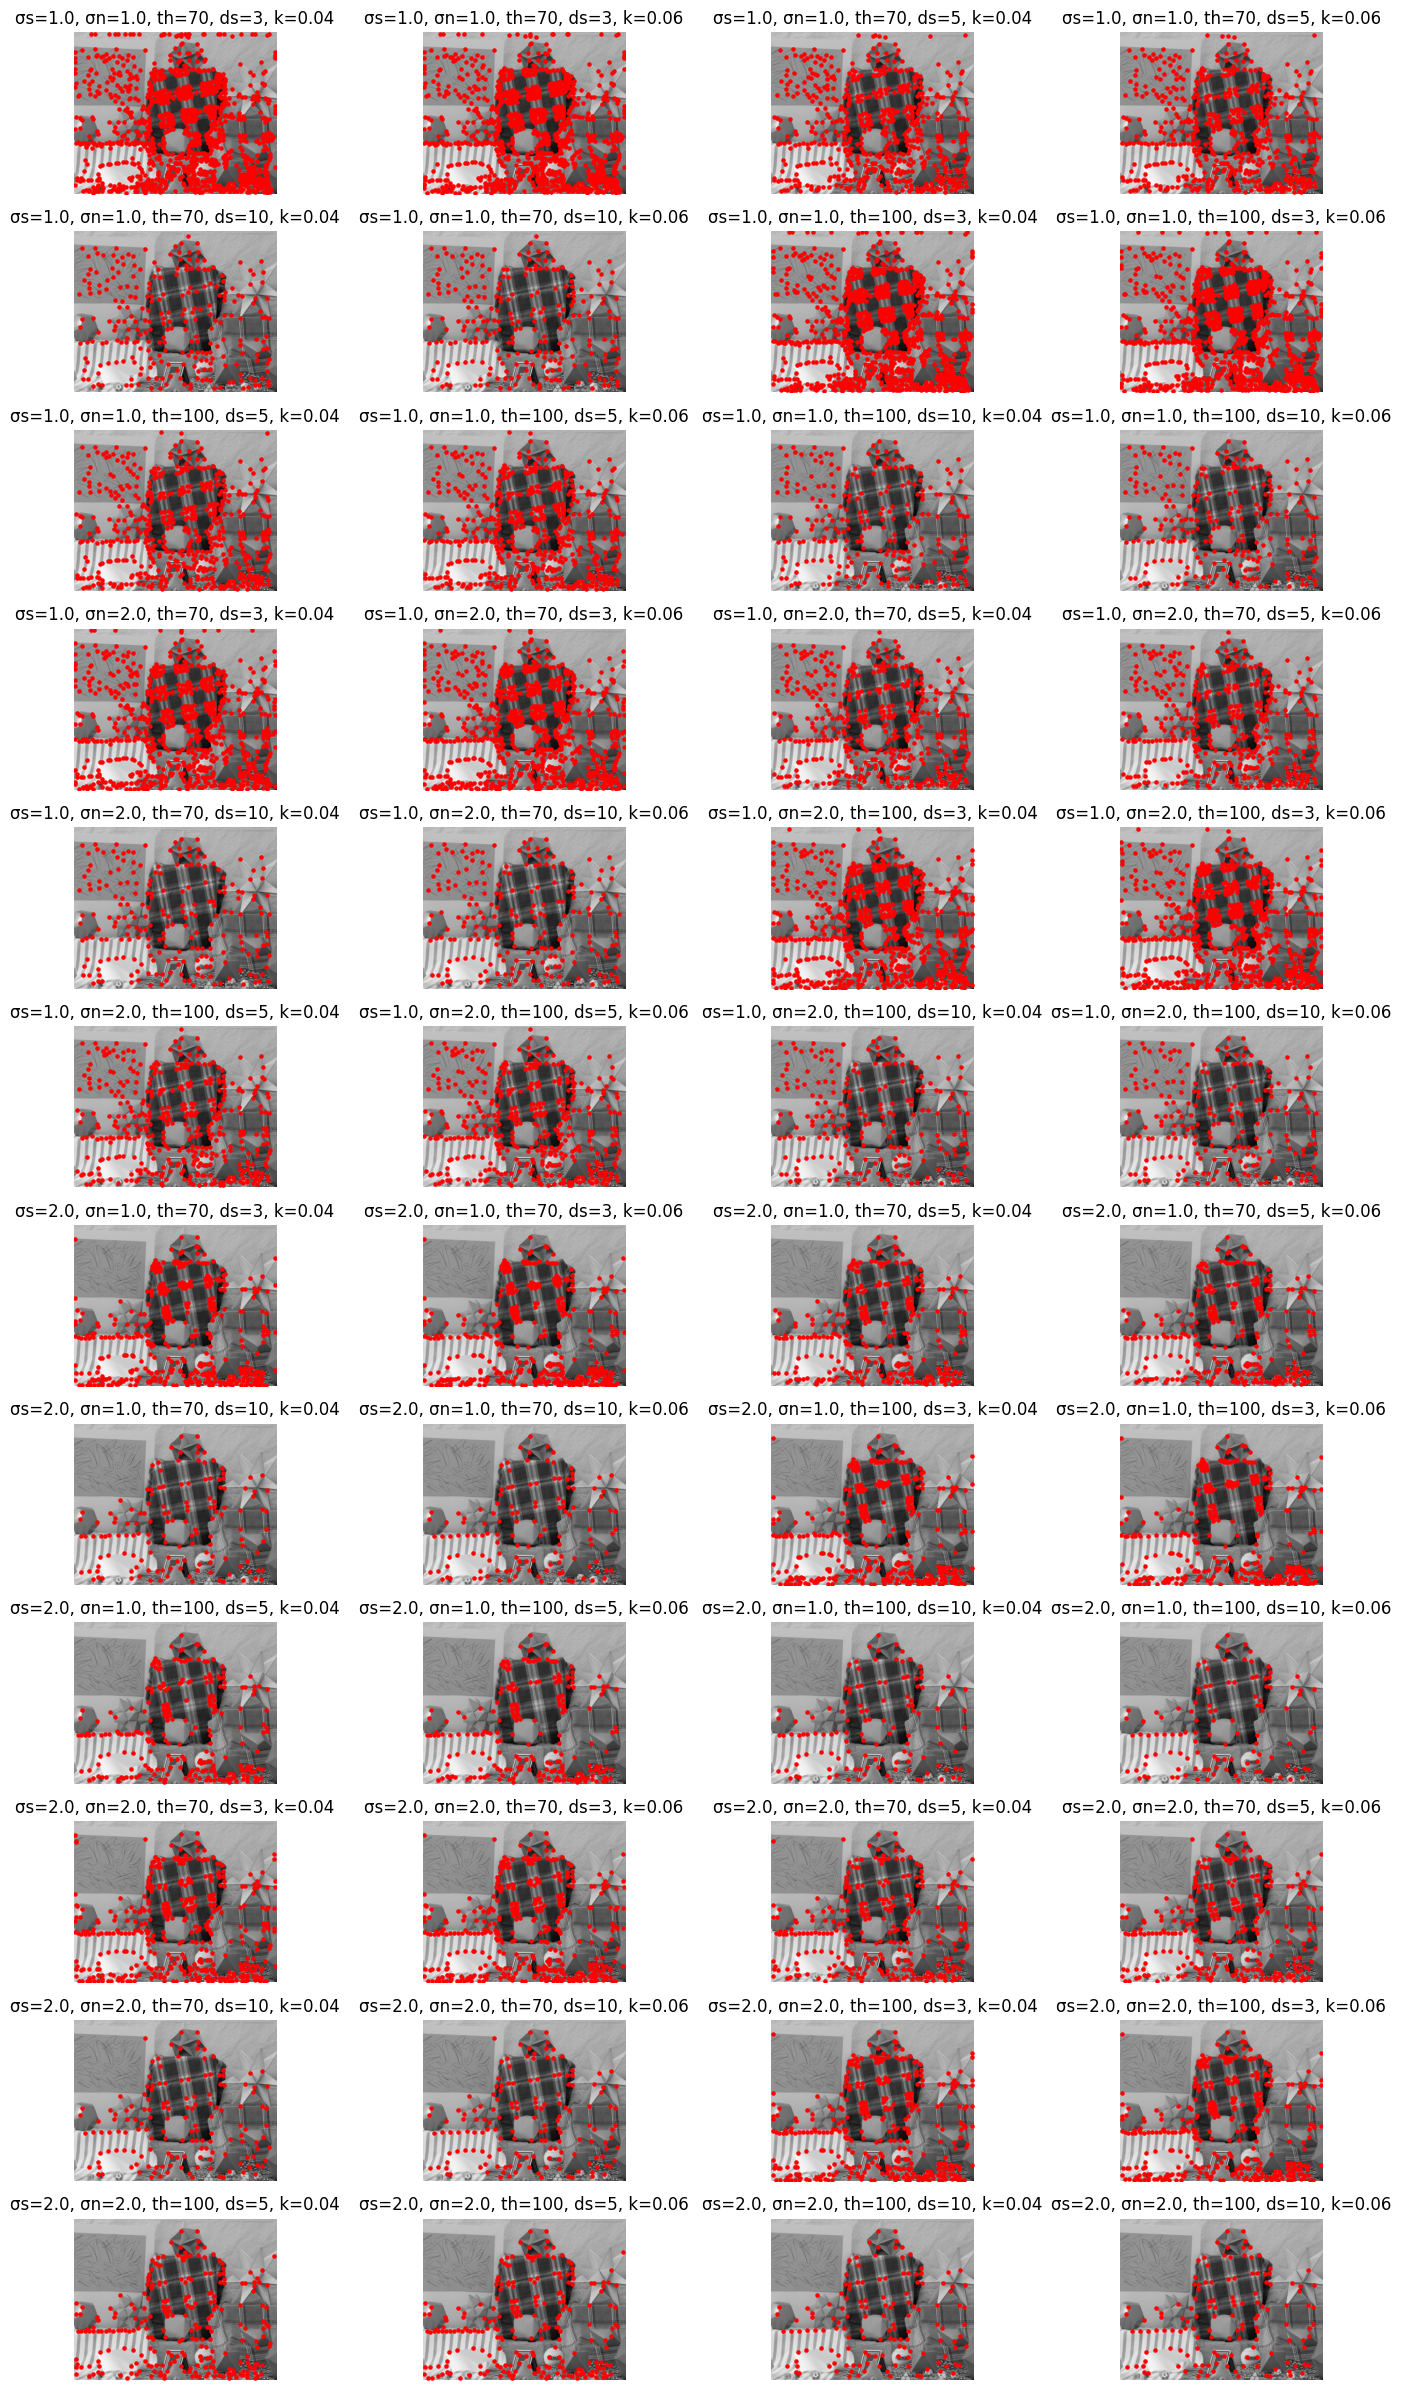

In [9]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Function definitions (H_corner, etc.) go here

# Load an image for testing
image_path = 'images/view0.tif'  # Replace with your image path
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Define parameter ranges for testing
sigma_smooth_values = [1.0, 2.0]
sigma_neighb_values = [1.0, 2.0]
threshold_values = [70, 100]
density_size_values = [3, 5, 10]
k_values = [0.04, 0.06]

# Preparing the plot grid
total_plots = len(sigma_smooth_values) * len(sigma_neighb_values) * len(threshold_values) * len(density_size_values) * len(k_values)
fig, axes = plt.subplots(total_plots // 4, 4, figsize=(15, total_plots // 2))
axes = axes.flatten()

# Counter for subplot indexing
plot_count = 0

# Testing loop
for sigma_smooth in sigma_smooth_values:
    for sigma_neighb in sigma_neighb_values:
        for th in threshold_values:
            for density_size in density_size_values:
                for k in k_values:
                    corners = H_corner(image, sigma_smooth, sigma_neighb, th, density_size, display=False, k=k)

                    # Plotting
                    ax = axes[plot_count]
                    ax.imshow(image, cmap='gray')
                    if corners:
                        corners_arr = np.array([coord for coord, _ in corners])
                        ax.scatter(corners_arr[:, 0], corners_arr[:, 1], s=5, c='r', marker='o')
                    ax.set_title(f"σs={sigma_smooth}, σn={sigma_neighb}, th={th}, ds={density_size}, k={k}")
                    ax.axis('off')

                    plot_count += 1

plt.tight_layout()
plt.show()

**Part 2 - Synthetic Image Test**

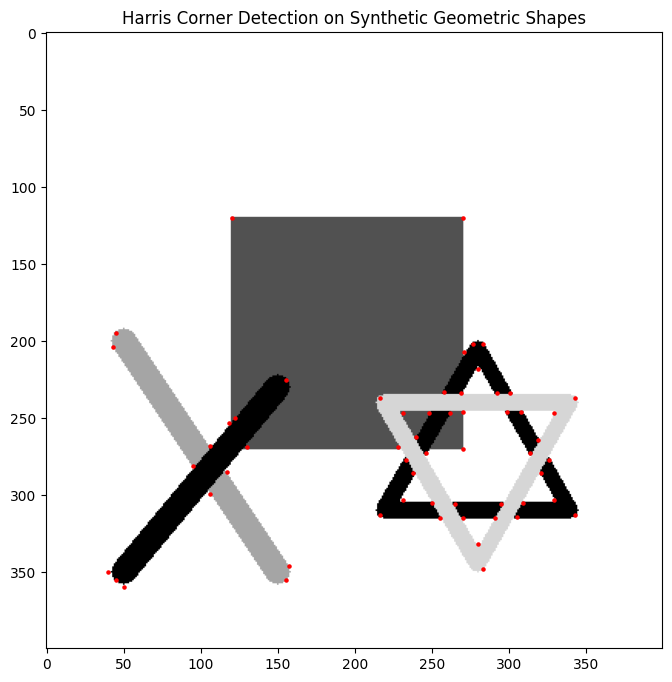

In [10]:
def draw_star_of_david(image, center, size):
    # Define the points for two triangles
    pts_up = np.array([
        (center[0], center[1] - size),
        (center[0] - size * np.sin(np.pi / 3), center[1] + size * np.cos(np.pi / 3)),
        (center[0] + size * np.sin(np.pi / 3), center[1] + size * np.cos(np.pi / 3))
    ], np.int32)
    pts_down = np.array([
        (center[0], center[1] + size),
        (center[0] - size * np.sin(np.pi / 3), center[1] - size * np.cos(np.pi / 3)),
        (center[0] + size * np.sin(np.pi / 3), center[1] - size * np.cos(np.pi / 3))
    ], np.int32)

    # Draw the triangles
    cv2.polylines(image, [pts_up.reshape((-1, 1, 2))], isClosed=True, color=(100), thickness=10)
    cv2.polylines(image, [pts_down.reshape((-1, 1, 2))], isClosed=True, color=(230), thickness=10)


def create_geometric_shapes_image(size):
    image = np.ones((size, size), dtype=np.uint8) * 255

    # Draw a square
    cv2.rectangle(image, (120, 120), (270, 270), 150, -1)

    # Draw lines
    cv2.line(image, (50, 200), (150, 350), 200, 15)
    cv2.line(image, (150, 230), (50, 350), 100, 15)

    # Draw Star of David
    draw_star_of_david(image, (280, 275), 70)

    return image

# Function definitions (H_corner, etc.) go here

# Create a synthetic image with geometric shapes
shapes_image = create_geometric_shapes_image(400)

# Apply Harris Corner Detector
corners = H_corner(shapes_image, sigma_smooth=1, sigma_neighb=1, th=70, density_size=3)

# Display the results
plt.figure(figsize=(8, 8))
plt.imshow(shapes_image, cmap='gray')
if corners:
    corners_arr = np.array([coord for coord, _ in corners])
    plt.scatter(corners_arr[:, 0], corners_arr[:, 1], s=5, c='r', marker='o')
plt.title('Harris Corner Detection on Synthetic Geometric Shapes')
plt.show()

**Part 3** - test on different images

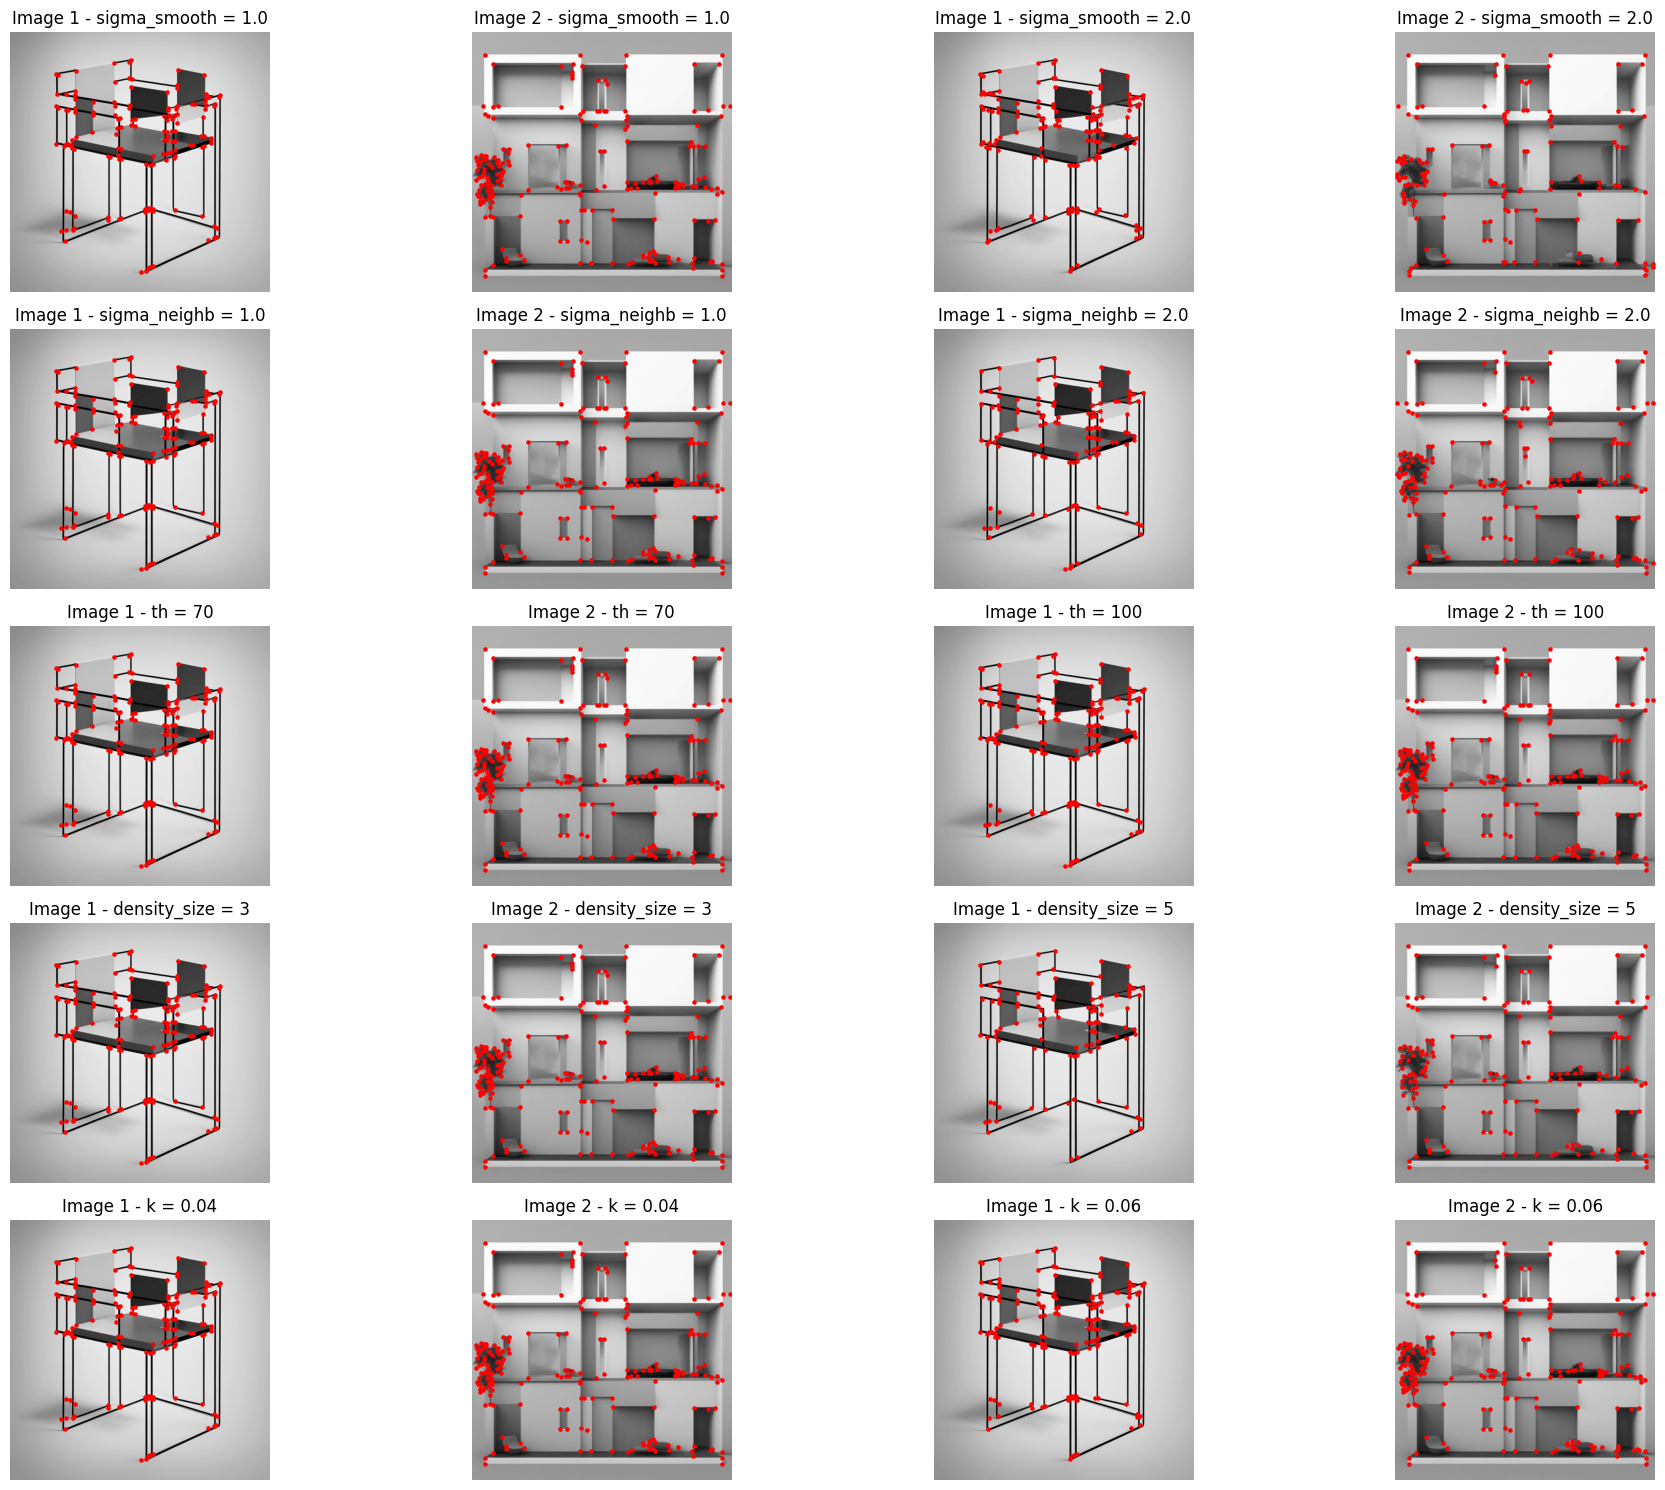

In [11]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load two sample images (replace with your image paths as needed)
image_path_1 = 'images/image1.jpg'
image_path_2 = 'images/image2.jpeg'
image_1 = cv2.imread(image_path_1, cv2.IMREAD_GRAYSCALE)
image_2 = cv2.imread(image_path_2, cv2.IMREAD_GRAYSCALE)

# Define two distinct values for each parameter
params = {
    'sigma_smooth': [1.0, 2.0],
    'sigma_neighb': [1.0, 2.0],
    'th': [70, 100],
    'density_size': [3, 5],
    'k': [0.04, 0.06]
}

# Create a figure for plotting
fig, axes = plt.subplots(len(params), 4, figsize=(20, 3 * len(params)))

for i, (param, values) in enumerate(params.items()):
    for j, value in enumerate(values):
        updated_params = { 'sigma_smooth': 1, 'sigma_neighb': 1, 'th': 70, 'density_size': 3, 'k': 0.04, 'display': False }
        updated_params[param] = value

        # Apply Harris corner detector on both images
        corners_1 = H_corner(image_1, **updated_params)
        corners_2 = H_corner(image_2, **updated_params)

        # Plot results for first image
        ax = axes[i, 2*j]
        ax.imshow(image_1, cmap='gray')
        if corners_1:
            corners_arr = np.array([coord for coord, _ in corners_1])
            ax.scatter(corners_arr[:, 0], corners_arr[:, 1], s=5, c='r', marker='o')
        ax.set_title(f"Image 1 - {param} = {value}")
        ax.axis('off')

        # Plot results for second image
        ax = axes[i, 2*j+1]
        ax.imshow(image_2, cmap='gray')
        if corners_2:
            corners_arr = np.array([coord for coord, _ in corners_2])
            ax.scatter(corners_arr[:, 0], corners_arr[:, 1], s=5, c='r', marker='o')
        ax.set_title(f"Image 2 - {param} = {value}")
        ax.axis('off')

plt.tight_layout()
plt.show()


**Part 4**

*Summarize the effects of each parameter on corner detection in your answer:*

**σ_smooth (Gaussian Smoothing):**

This parameter controls the Gaussian smoothing applied to the image before processing.
A larger value of σ_smooth will result in more blurring, which can help reduce noise and false corner detections. A smaller value preserves more details but might be more susceptible to noise, potentially resulting in false corner detections.

**σ_neighb (Neighborhood Gaussian):**

This parameter determines the size of the window used to compute the Harris matrix (C matrix in the algorithm), which influences corner strength.
A larger σ_neighb considers a wider neighborhood, which could merge closely spaced corners into a single detected corner, thus reducing the total number of detected corners.
A smaller value makes the algorithm more sensitive to individual corners but might result in detecting multiple corners in close proximity where there should be only one.

**th (Threshold):**

This threshold parameter is used to decide whether a given corner strength value is significant enough to be considered a corner.
Lowering th increases the sensitivity of the detector, leading to more corners being detected. Increasing th reduces the number of detected corners, potentially missing weaker but genuine corners, but it also reduces false positives.

**density_size (Non-maximum Suppression Window Size):**

This parameter sets the size of the window used in non-maximum suppression, which is a post-processing step to ensure that each detected corner is spatially distinct.
A smaller density_size allows the detection of corners that are closer to each other, which can be beneficial in images with high detail or texture.
A larger value will enforce a greater distance between detected corners, which might be useful in avoiding multiple detections of the same corner but could also miss genuinely separate corners that are close together.

**Part 5** - mark an example of a corner that appears on one of the images and not on the other. Provide a possible explanation for why a corner was not found in the other image.

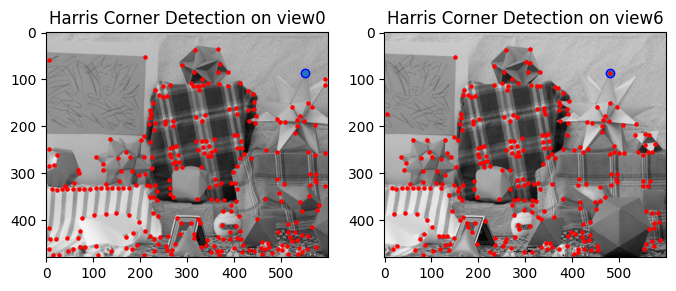

In [12]:
img1_path = 'images/view0.tif'
img2_path = 'images/view6.tif'

img_1 = cv2.imread(img1_path, cv2.IMREAD_GRAYSCALE)
img_2 = cv2.imread(img2_path, cv2.IMREAD_GRAYSCALE)

corners_1 = H_corner(img_1, sigma_smooth=2, sigma_neighb=2, th=50, density_size=5, k=0.06)
corners_2 = H_corner(img_2, sigma_smooth=2, sigma_neighb=2, th=50, density_size=5, k=0.06)

plt.subplot(1,2,1)
plt.imshow(img_1, cmap='gray')
plt.scatter(550,87,edgecolors='blue',linewidths=1, marker='o')
if corners_1:
    corners_arr_1 = np.array([coord for coord, _ in corners_1])
    plt.scatter(corners_arr_1[:, 0], corners_arr_1[:, 1], s=5, c='r', marker='o')
plt.title('Harris Corner Detection on view0')

plt.subplot(1,2,2)
plt.imshow(img_2, cmap='gray')
plt.scatter(480,87,edgecolors='blue',linewidths=1, marker='o')
if corners_2:
    corners_arr_2 = np.array([coord for coord, _ in corners_2])
    plt.scatter(corners_arr_2[:, 0], corners_arr_2[:, 1], s=5, c='r', marker='o')
plt.title('Harris Corner Detection on view6')
plt.show()


**There could be several reasons for finding a corner on one image and not in the other image:**
1. Thresholding Parameters: If the threshold is too high, it may filter out corners that are present in the second image but don't meet the threshold criteria due to small changes.
2. Image Alignment: If the two images are not perfectly aligned, even a small change in angle might result in corners being at slightly different locations in the two images.
3. Edge Effects:The Harris corner detector is sensitive to edges as well. If there are prominent edges in one image and not in the other, it might influence corner detection. 
4. Limited Local Structure: If the local structure around a corner is not well-defined or if it lacks corners in the immediate neighborhood, the Harris detector might not be able to detect it.